In [70]:
#Assignment 2 - Boston Housing

In [71]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
from sklearn.model_selection import train_test_split

# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True


In [72]:
# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

#neighborhood

#Name of the Boston neighborhood

#mv -  Median value of homes in thousands of 1970 dollars
#nox -  Air pollution (nitrogen oxide concentration)
#crim - Crime rate
#zn - Percent of land zoned for lots
#indus - Percent of business that is industrial or nonretail
#chas - On the Charles River (1) or not (0)
#rooms - Average number of rooms per home
#age - Percentage of homes built before 1940
#dis - Weighted distance to employment centers
#rad - Accessibility to radial highways
#tax - Tax rate
#ptratio - Pupil/teacher ratio in public schools
#lstat- Percentage of population of lower socio-economic status


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [73]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB
None

General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 n

In [74]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [75]:
# All data is present
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
mv         0
dtype: int64

In [76]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized unitbosss of measure
print('\nDimensions for model_data:', model_data.shape)


Data dimensions: (506, 13)
StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]

Dimensions for model_data: (506, 13)


In [77]:
df = pd.DataFrame(data = prelim_model_data, columns = ['mv',
    'crim',
    'zn',
    'indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat'])
#since we are focusing on a just a few variables we can delete the following :
for col in ['indus','chas','dis','rad'] : del df[col]
df.head()

,mv,crim,zn,nox,rooms,age,tax,ptratio,lstat
0,24.0,0.00632,18.0,0.538,6.575,65.2,296.0,15.3,4.98
1,21.6,0.02731,0.0,0.469,6.421,78.9,242.0,17.8,9.14
2,34.7,0.02729,0.0,0.469,7.185,61.1,242.0,17.8,4.03
3,33.4,0.03237,0.0,0.458,6.998,45.8,222.0,18.7,2.94
4,36.2,0.06905,0.0,0.458,7.147,54.2,222.0,18.7,5.33


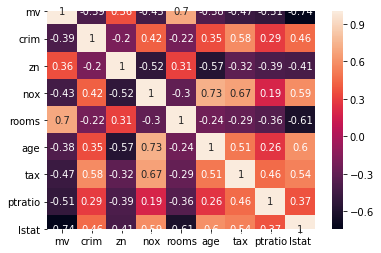

In [78]:
correlation_matrix = df.corr().round(3)

sns.heatmap(data=correlation_matrix, annot=True)

# annot = True to print the values inside the square
#NOX and Median Value of Home have a strong NEGATIVE correlation
#Median Value of Homes and Room have a strong POSITIVE Correlation

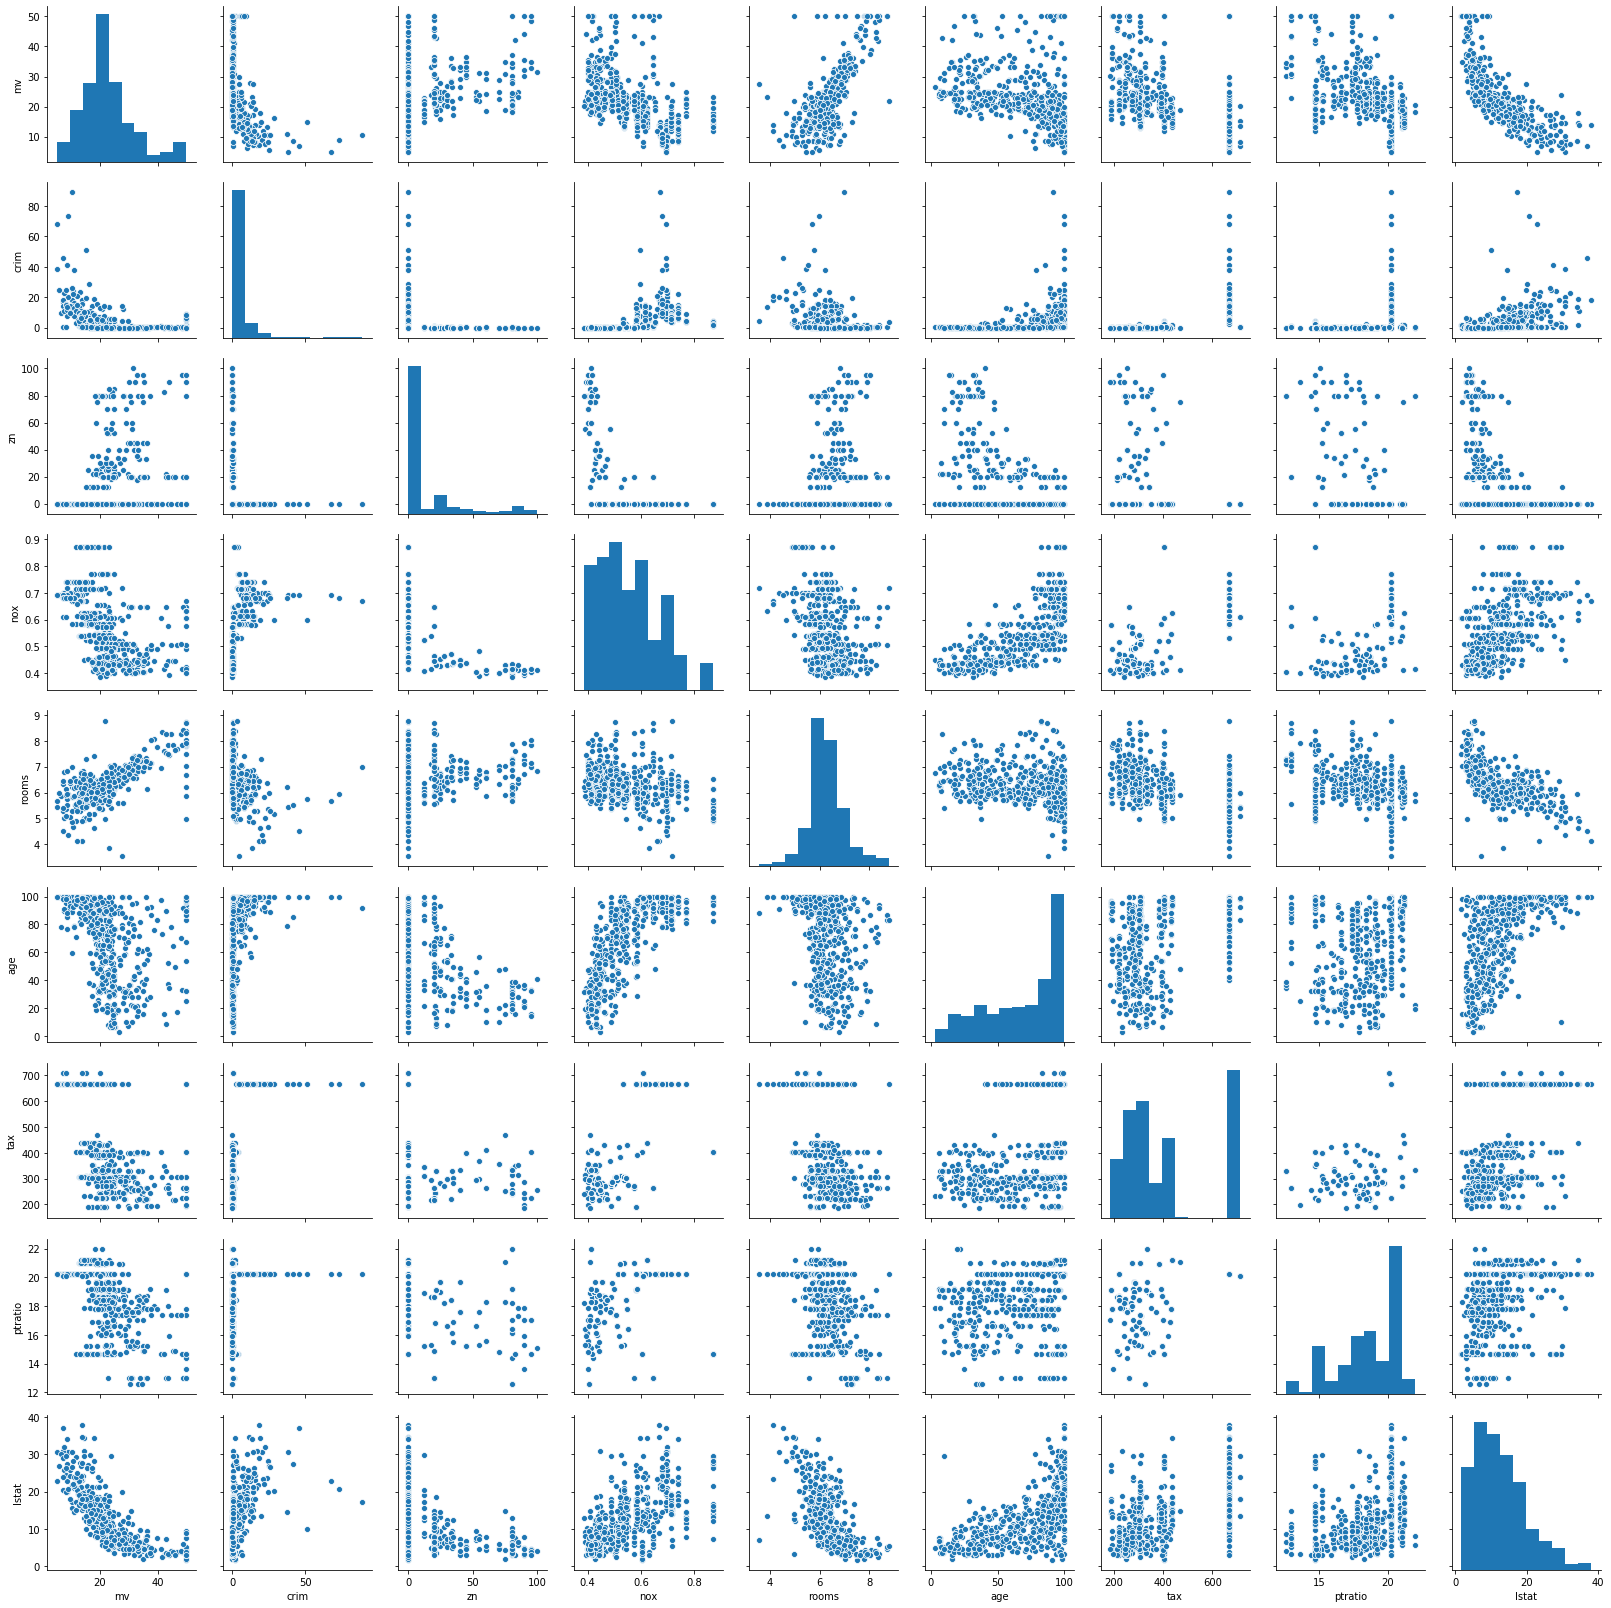

In [87]:
# pairplot
sns.pairplot(df)
#Visualizing the heatmap to view better correlation

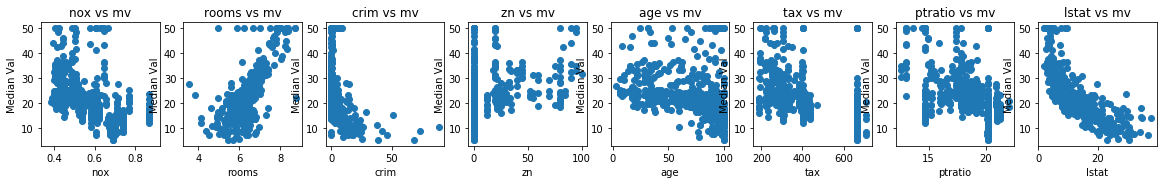

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

features = ['nox', 'rooms', 'crim', 'zn', 'age', 'tax', 'ptratio', 'lstat']
target = df['mv']

for i, col in enumerate(features):
    plt.subplot(2, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col + " vs mv")
    plt.xlabel(col)
    plt.ylabel('Median Val')
    
    
    
#as the pollution levels increase there is a decline in the median value of Homes 
#as the number of rooms of the house increases so does the median value of the home

In [111]:
#Now I split the data we have and assign test and train data
X = pd.DataFrame(np.c_[df['nox'], df['crim'],df['zn'],df['age'],df['tax'],df['ptratio'],df['lstat'],boston['rooms']], columns = ['NOX','Crime', 'zN','Age',
                                                                                                                                 'Tax','Ptratio','lstat','ROOMS'])
Y = df['mv']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 8)
(102, 8)
(404,)
(102,)


In [112]:
#training and testing the model

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.202499198765829
R2 score is 0.6832611857004922


The model performance for testing set
--------------------------------------
RMSE is 4.9247484606070255
R2 score is 0.6917477359631874


In [113]:
#We will use elastic net to compare the median value of homes compared to the pollution and number of rooms.

In [122]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.01,l1_ratio=0.05) #a higher value of alpha restricts the coefficients further
en.fit(X,Y)


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.05,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [123]:
# model evaluation for training set
y_train_predict = en.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = en.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.223732844844611
R2 score is 0.6806704136502162


The model performance for testing set
--------------------------------------
RMSE is 4.728182008956731
R2 score is 0.715863817569071


In [129]:
train_linr_r2 = 0.68

test_linr_r2 = 0.69

train_elastic_r2 = 0.68

test_elastic_r2 = 0.72

data = [[train_linr_r2, test_linr_r2], [train_elastic_r2, test_elastic_r2]]

df1 = pd.DataFrame(data, columns = ["train", "test"], index = ["linear", "elastic"])
df1

,train,test
linear,0.68,0.69
elastic,0.68,0.72
